In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The traiun and validation directories
# each have the subdirecoriesyt "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/c

In [183]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255.
)
validation_image_generator = ImageDataGenerator(
    rescale=1./255.
)
test_image_generator = ImageDataGenerator(
    rescale=1./255.
)

test_data_gen = test_image_generator.flow_from_directory(directory="cats_and_dogs",
                                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         batch_size=batch_size,
                                                         shuffle=False,
                                                         classes=["test"])

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
                                               input_shape=(IMG_HEIGHT,IMG_WIDTH,3),
                                               include_top=False,classes=2,
                                               weights="imagenet"#,pooling="max
                                              )

base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)
model = Sequential([
          base_model,
          global_average_layer,
          prediction_layer
])
model.summary()

Found 50 images belonging to 1 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [186]:
from tensorflow.keras.optimizers import Adam


model.compile(
    optimizer = Adam(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
history = model.fit(train_data_gen,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=2000//batch_size,
                    validation_steps =1000//batch_size,
                    validation_data=val_data_gen)

Epoch 1/15
15/15 [==============================] - 46s 3s/step - loss: 1.0876 - accuracy: 0.5513 - val_loss: 0.6498 - val_accuracy: 0.6484
Epoch 2/15
15/15 [==============================] - 42s 3s/step - loss: 0.8556 - accuracy: 0.5614 - val_loss: 0.6226 - val_accuracy: 0.6685
Epoch 3/15
15/15 [==============================] - 41s 3s/step - loss: 0.7727 - accuracy: 0.6010 - val_loss: 0.5120 - val_accuracy: 0.7366
Epoch 4/15
15/15 [==============================] - 42s 3s/step - loss: 0.7255 - accuracy: 0.6255 - val_loss: 0.4526 - val_accuracy: 0.7801
Epoch 5/15
15/15 [==============================] - 42s 3s/step - loss: 0.6795 - accuracy: 0.6517 - val_loss: 0.4306 - val_accuracy: 0.8002
Epoch 6/15
15/15 [==============================] - 41s 3s/step - loss: 0.6394 - accuracy: 0.6886 - val_loss: 0.3813 - val_accuracy: 0.8281
Epoch 7/15
15/15 [==============================] - 41s 3s/step - loss: 0.6122 - accuracy: 0.6880 - val_loss: 0.3585 - val_accuracy: 0.8504
Epoch 8/15
15/15 [==

In [131]:
model.save("cats_and_dogs/catsanddogs.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


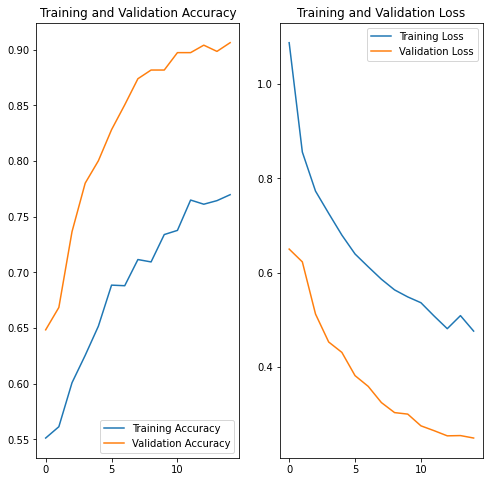

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [190]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [193]:
predictions = np.argmax(model.predict(test_data_gen),axis=-1)

probabilities = predictions

test_images,_=next(test_data_gen)

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0
print([a for a in zip(probabilities,answers)])
for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))
print(percentage_identified)
passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

[(1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
0.9
Your model correctly identified 0.9% of the images of cats and dogs.
You passed the challenge!
